#Data Preparation 
Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/bangkit_project/dataset"

ham10000_images_part_1	healthy		      test_1   train_lama
ham10000_images_part_2	hmnist_28_28_RGB.csv  train    val_1
HAM10000_metadata.csv	test		      train_1


In [ ]:
path = "/content/gdrive/My Drive/bangkit_project/dataset"

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/bangkit_project/dataset/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Identify and Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Data Cleaning

In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Handling the Prolem
- Detecting Na and na values

In [ ]:
missing_value = ['N/a', 'na', ' ', np.nan]
df = pd.read_csv("/content/gdrive/MyDrive/bangkit_project/dataset/HAM10000_metadata.csv", na_values=missing_value)

In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
df.isnull().any()

lesion_id       False
image_id        False
dx              False
dx_type         False
age              True
sex             False
localization    False
dtype: bool

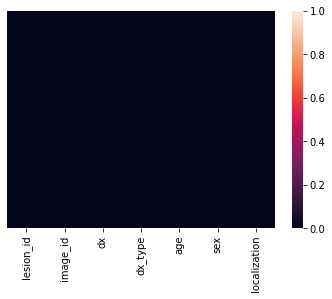

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

fill na values with mean of 'age' column 

In [ ]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Exploratory Data Analysis

In [ ]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


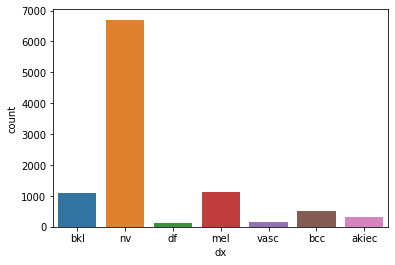

In [ ]:
sns.countplot(df['dx'])

In [ ]:
dx = df['dx'].value_counts().sort_index()
print(dx)

akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: dx, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

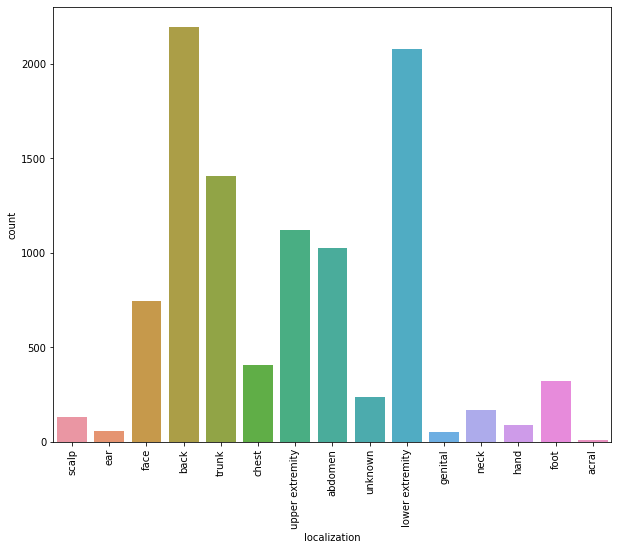

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['localization'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


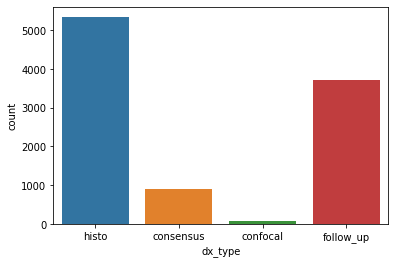

In [ ]:
sns.countplot(df['dx_type'])

In [ ]:
dx_type = df['dx_type'].value_counts().sort_index()
print(dx_type)

confocal       69
consensus     902
follow_up    3704
histo        5340
Name: dx_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


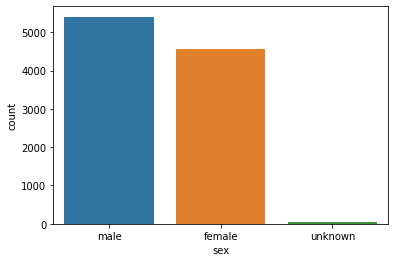

In [ ]:
sns.countplot(df['sex'])

In [ ]:
sex = df['sex'].value_counts().sort_index()
print(sex)

female     4552
male       5406
unknown      57
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

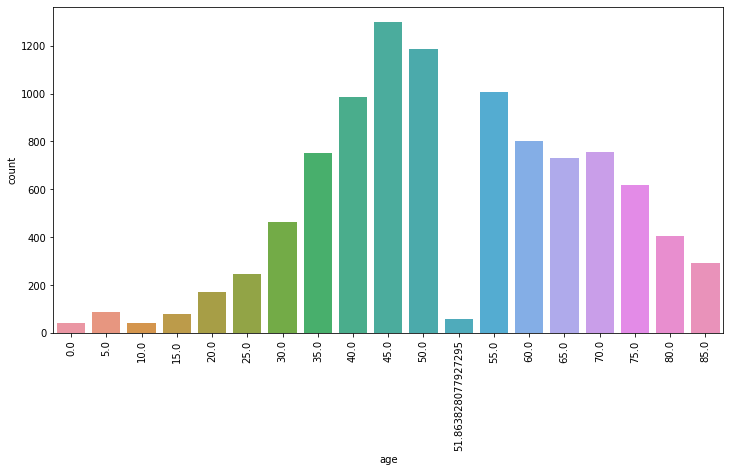

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['age'])
plt.xticks(rotation=90)

In [ ]:
age = df['age'].value_counts().sort_index()
print(age)

0.000000       39
5.000000       86
10.000000      41
15.000000      77
20.000000     169
25.000000     247
30.000000     464
35.000000     753
40.000000     985
45.000000    1299
50.000000    1187
51.863828      57
55.000000    1009
60.000000     803
65.000000     731
70.000000     756
75.000000     618
80.000000     404
85.000000     290
Name: age, dtype: int64


In [ ]:
#record the label names
labels = ['Actinic Keratoses', 
          'Basal Cell Carcinoma', 
          'Benign Keratosis', 
          'Dermatofibroma', 
          'Malignant Melanoma', 
          'Melanocytic Nevi', 
          'Vascular Lesions']

num_classes = len(labels)

In [ ]:
# create local data directory 
data_dir = 'data'
os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(data_dir, 'val')
os.mkdir(val_dir)

test_dir = os.path.join(data_dir, 'test')
os.mkdir(test_dir) 


In [ ]:
# create directory for each category in train/validation/test directory
categories = dx.index.values
for category in categories:
    os.mkdir(os.path.join(train_dir, category))
    os.mkdir(os.path.join(val_dir, category))
    os.mkdir(os.path.join(test_dir, category))


In [ ]:
# Split to train and validation set
from sklearn.model_selection import train_test_split
df_train, df_tmp = train_test_split(df, test_size=0.2, random_state=101, stratify=df['dx'])
df_val, df_test = train_test_split(df_tmp, test_size=0.5, random_state=101)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(8012, 7)
(1001, 7)
(1002, 7)


In [ ]:
# image_id as df index
df_train = df_train.set_index('image_id') 
df_val   = df_val.set_index('image_id') 
df_test  = df_test.set_index('image_id')

In [ ]:
folder_1 = os.listdir('/content/gdrive/MyDrive/bangkit_project/dataset/ham10000_images_part_1')
folder_2 = os.listdir('/content/gdrive/MyDrive/bangkit_project/dataset/ham10000_images_part_2')

def copy_files(df, data_dir):
    fileList = df.index.values
    
    for file in fileList:
        fname = file + '.jpg'
        label = df.loc[file, 'dx'] 

        if fname in folder_1:
            src = os.path.join('/content/gdrive/MyDrive/bangkit_project/dataset/ham10000_images_part_1', fname)
            dst = os.path.join(data_dir, label, fname)
            shutil.copyfile(src, dst)
            
        if fname in folder_2:
            src = os.path.join('/content/gdrive/MyDrive/bangkit_project/dataset/ham10000_images_part_2', fname)
            dst = os.path.join(data_dir, label, fname)
            shutil.copyfile(src, dst)

In [ ]:
import shutil
copy_files(df_train, train_dir)
copy_files(df_val, val_dir)
copy_files(df_test, test_dir)

In [ ]:
from shutil import make_archive
shutil.make_archive('data', 'zip', root_dir='/content/data')

'/content/data.zip'

In [ ]:
from google.colab import files
files.download('/content/data/test')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_train['dx'].value_counts()

nv       5364
mel       890
bkl       879
bcc       411
akiec     262
vasc      114
df         92
Name: dx, dtype: int64

In [ ]:
df_val['dx'].value_counts()

nv       670
mel      115
bkl      110
bcc       52
akiec     28
vasc      16
df        10
Name: dx, dtype: int64

In [ ]:
df_test['dx'].value_counts()

nv       671
bkl      110
mel      108
bcc       51
akiec     37
df        13
vasc      12
Name: dx, dtype: int64

In [ ]:
print(len(os.listdir('/content/data/train/akiec')))
print(len(os.listdir('/content/data/train/bcc')))
print(len(os.listdir('/content/data/train/bkl')))
print(len(os.listdir('/content/data/train/df')))
print(len(os.listdir('/content/data/train/mel')))
print(len(os.listdir('/content/data/train/nv')))
print(len(os.listdir('/content/data/train/vasc')))

262
411
879
92
890
5364
114


In [ ]:
print(len(os.listdir('/content/data/val/akiec')))
print(len(os.listdir('/content/data/val/bcc')))
print(len(os.listdir('/content/data/val/bkl')))
print(len(os.listdir('/content/data/val/df')))
print(len(os.listdir('/content/data/val/mel')))
print(len(os.listdir('/content/data/val/nv')))
print(len(os.listdir('/content/data/val/vasc')))

28
52
110
10
115
670
16


In [ ]:
print(len(os.listdir('/content/data/test/akiec')))
print(len(os.listdir('/content/data/test/bcc')))
print(len(os.listdir('/content/data/test/bkl')))
print(len(os.listdir('/content/data/test/df')))
print(len(os.listdir('/content/data/test/mel')))
print(len(os.listdir('/content/data/test/nv')))
print(len(os.listdir('/content/data/test/vasc')))

37
51
110
13
108
671
12


**Data Augmentation and Flow Data**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2)

train_generator = train_datagen.flow_from_directory('/content/data/train',
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    color_mode='rgb',    
                                                    shuffle=True,
                                                    seed=42,
                                                    class_mode='categorical')

Found 8012 images belonging to 7 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        horizontal_flip = True,
                                        vertical_flip = True,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2)

validation_generator = train_datagen.flow_from_directory('/content/data/val',
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         color_mode='rgb',    
                                                         shuffle=True,
                                                         seed=42,
                                                         class_mode='categorical')

Found 1001 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = train_datagen.flow_from_directory('/content/data/test',
                                                   target_size = (224, 224),
                                                   batch_size = 32,
                                                   color_mode='rgb',    
                                                   shuffle=True,
                                                   seed=42,
                                                   class_mode='categorical')

Found 1002 images belonging to 7 classes.


In [ ]:
'''
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=None,
        output_shapes=([None,
                        input_shape[0],
                        input_shape[1],
                        input_shape[2]],
                        [None, num_class])
    )
    return tf_generator

train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(validation_generator, input_shape)
'''

'\ndef tf_data_generator(generator, input_shape):\n    num_class = generator.num_classes\n    tf_generator = tf.data.Dataset.from_generator(\n        lambda: generator,\n        output_types=None,\n        output_shapes=([None,\n                        input_shape[0],\n                        input_shape[1],\n                        input_shape[2]],\n                        [None, num_class])\n    )\n    return tf_generator\n\ntrain_data = tf_data_generator(train_generator, input_shape)\ntest_data = tf_data_generator(test_generator, input_shape)\nval_data = tf_data_generator(validation_generator, input_shape)\n'

# Build Model 

Manually Define CNN

In [ ]:
input_shape = (224, 224, 3)
num_classes = 7

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.55),
    
    Dense(7, activation='softmax')
])

print('Compiling Model.............')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Compiling Model.............


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

Using Pre-Trained model with Transfer Learning

**Build Base Model**

In [ ]:
base_model= MobileNetV2(input_shape = input_shape, 
                        weights = 'imagenet',
                        include_top = False, 
                        classes = num_classes)

9412608/9406464 [==============================] - 0s 0us/step


**Add Top Layers Network**

In [ ]:
model = base_model.output
model = GlobalAveragePooling2D()(model)
model = Dense(1024, activation="relu")(model)
model = Dense(512, activation="relu")(model)
model = Dense(256, activation="relu")(model)
model = Dense(128, activation="relu")(model)
model = Dense(64, activation="relu")(model)
model = Dense(32, activation="relu")(model)
model = Dropout(0.2)(model)
model = BatchNormalization()(model)

predictions = Dense(num_classes, activation='softmax')(model)

model = Model(inputs=base_model.input,outputs=predictions)

base_model.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

**Compile Model**

In [ ]:
#compile model
print('Compiling Model............')

# Compile the model
model.compile(optimizer = 'adam', 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

Compiling Model............


**Visualization Models**

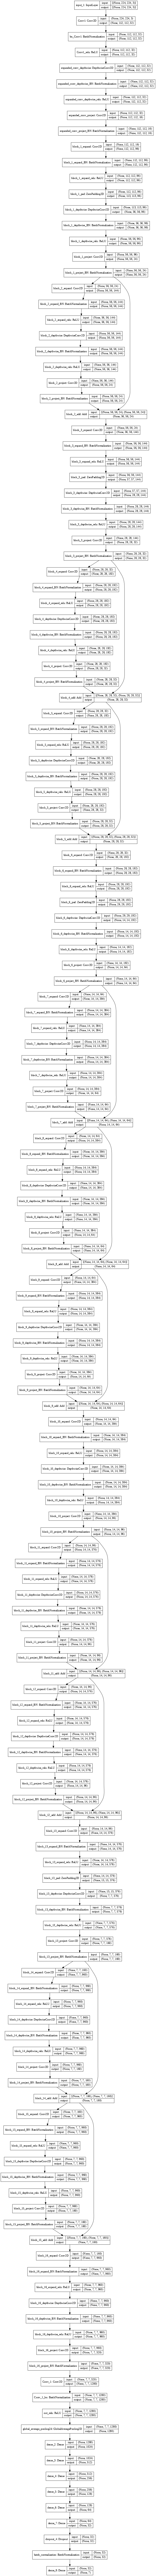

In [ ]:
#visualization models
model_visual = tf.keras.utils.plot_model(model,
                          to_file='model_visualization.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_visual

**Training the Model**

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(train_generator), 
                              epochs=25, 
                              validation_data=validation_generator, 
                              validation_steps=len(validation_generator),
                              shuffle=True,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
251/251 [==============================] - 422s 2s/step - loss: 1.4022 - accuracy: 0.5366 - val_loss: 0.9401 - val_accuracy: 0.6933
Epoch 2/25
157/251 [=================>............] - ETA: 2:07 - loss: 0.9169 - accuracy: 0.6877

KeyboardInterrupt: ignored

**Plot the Model Training**

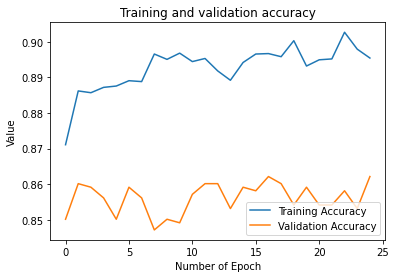

In [ ]:
#------------------------------------------------
# Evaluating acc and loss for model
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(history.history['accuracy'], label = 'Training Accuracy' )
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

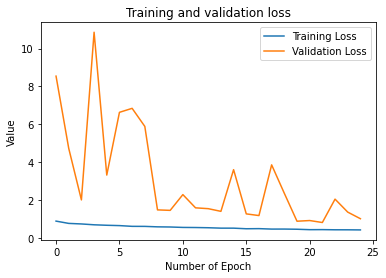

In [ ]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(history.history['loss'], label = 'Training Loss' )
plt.plot(history.history['val_loss'], label = 'Validation Loss' )
plt.title('Training and validation loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

**Save Model**

In [ ]:
model.save('skin_cancer.h5')

Save model with not saving *optimizer* state when it was last saved so this is save storage and simplify the deployment process

In [ ]:
model.save('skin_cancer_opt.h5', include_optimizer=False)

**Convert Model to tfjs**

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 112kB 7.5MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
!mkdir sixtek

In [ ]:
!tensorflowjs_converter --input_format keras \
                       /content/skin_cancer.h5 \
                       /content/sixtek

2021-05-24 10:22:34.495853: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
from shutil import make_archive
shutil.make_archive('sixtek', 'zip', root_dir='/content/sixtek')

'/content/sixtek.zip'

**Convert Model to tflite**

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/content/skin_cancer.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpasidwzp4/assets


INFO:tensorflow:Assets written to: /tmp/tmpasidwzp4/assets


16906972

**Convert Model to PB file**

In [ ]:
#creates a SavedModel folder 'my_model'
#model.save("my_model") 
#!ls my_model
# isinya ntr my_model.pb, assets, variables


**Model Evaluation using data testing**

In [ ]:
loss, accuracy = model.evaluate_generator(test_generator, steps = len(test_generator), verbose = 0)

print('The Accuracy of Model is {:.3f}', format(acc))
print('The Loss of Model is {:.3f}', format(loss))

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

predict = model.predict_generator(test_generator)
y_predict = np.argmax(predict, axis = 1)
y_true = test_generator.classes
confusion_matrix = confusion_matrix(actual_gen, predict_gen)

print(conf_matrix)

**Plot Confusion Matrix**

In [ ]:
figure, fx = plt.subplots()
fx.matshow(confusion_matrix, cmap = 'Greens')

for (i, j), z in np.ndenumerate(confusion_matrix):
  fx.text(j, i, '{:d}'.format(z), ha='center', va='center')

plt.show()

**Classification Report**

Classification Report Visualizer Displays the Precision, Recall, F1, and Support Scores for the Model.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))

**Make Prediction Function**